In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
file_name = 'enregistrement_PID_ventilateur_RPI_4.csv'

In [26]:
# Lire le fichier CSV
df_header = pd.read_csv(file_name, nrows=1) # Lire la première ligne
df_body = pd.read_csv(file_name, skiprows=2) # Lire le reste du fichier

In [27]:
# Afficher le contenu du header
df_header


,Tau FTBO,Tau FTBF,ki,kp,kd,dt,Nb de points de lecture Temp.
0,230,300,0.003333,46,0,5000,10


In [28]:
df_body['P_range'].unique()

array([1.3, 1. , 1.7])

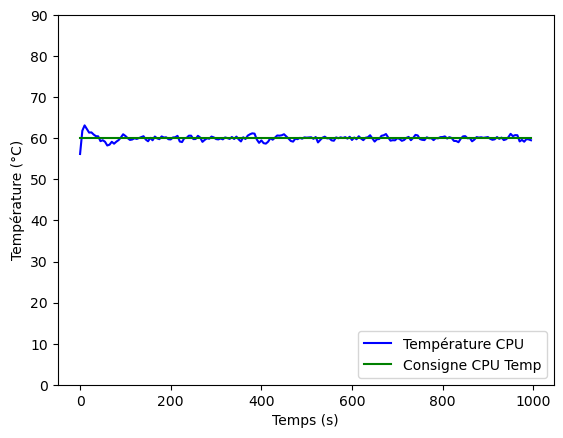

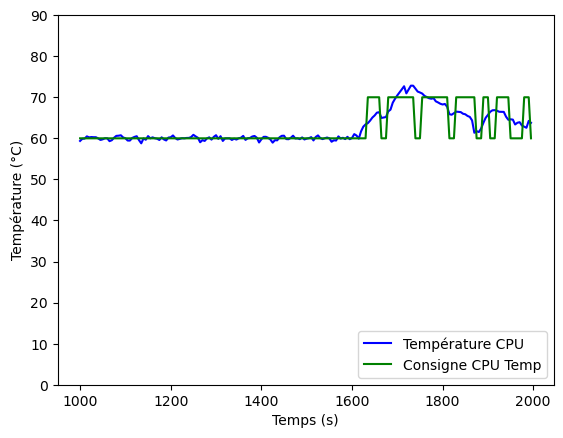

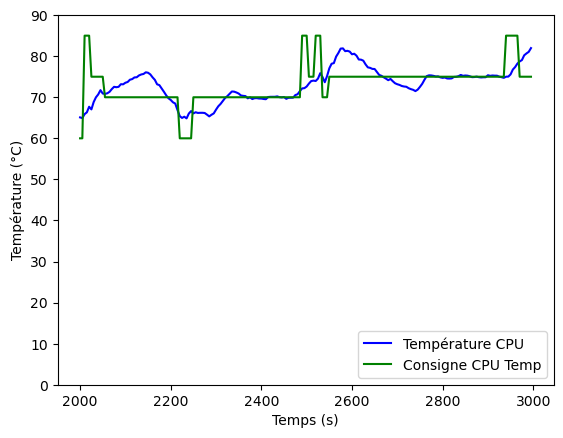

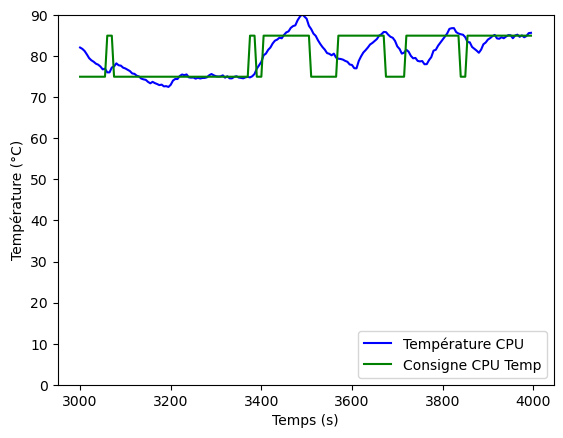

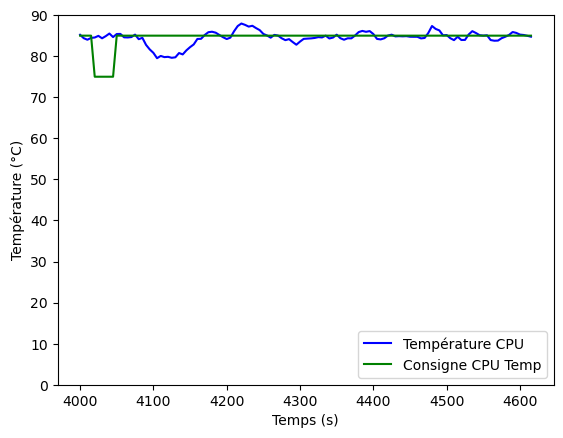

In [29]:
# Tracer les courbes
index_step = 200
complete_column_list = ['Température CPU', 'Consigne CPU Temp', 'Heure', 'CPU Usage (%)','CPU Frequency (MHz)', 'Erreur', 'Correction dérivée', 'Correction intégrale', 'PWM signal', 'PWM signal clipped']

column_list_axis1 = ['Température CPU', 'Consigne CPU Temp']
column_list_axis2 = ['Correction intégrale'] # 

colors_axis1 = ['blue', 'green', 'red']
colors_axis2 = ['red', 'brown']

for i in range(0, len(df_body), index_step):
    index_min = i
    index_max = i + index_step

    # fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
    fig, ax1 = plt.subplots()

    for column, color in zip(column_list_axis1, colors_axis1):
        ax1.plot(df_body.index[index_min:index_max] * 5, df_body[column][index_min:index_max], label=column, color=color)
        ax1.set_xlabel('Temps (s)')
        ax1.set_ylabel('Température (°C)')
        ax1.set_ylim([0, 90])
        ax1.legend(loc='lower right')

    # ax2 = ax1.twinx()

    # for column, color in zip(column_list_axis2, colors_axis2):
    #     ax2.plot(df_body.index[index_min:index_max] * 5, df_body[column][index_min:index_max], label=column, color=color)
    #     ax2.legend(loc='upper right')

    plt.show()